In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

In [2]:
size, alpha, a, b, h, cp, hp, d, cm, hm = np.loadtxt("Carbonaceous_Table.txt", unpack=True)

In [3]:
print(size)

[    3.5     5.     10.     50.    100.    500.   1000. ]


In [4]:
f1d_alpha = interp1d(size, alpha, fill_value="extrapolate", kind="linear")
f1d_a     = interp1d(size, a, fill_value="extrapolate", kind="linear")
f1d_b     = interp1d(size, b, fill_value="extrapolate", kind="linear")
f1d_h     = interp1d(size, h, fill_value="extrapolate", kind="linear")

In [5]:
Test_sizes = [7.5, 25, 75, 250, 750, 2500]

In [6]:
alpha_test = f1d_alpha(Test_sizes)
a_test     = f1d_a(Test_sizes)
b_test     = f1d_b(Test_sizes)
h_test     = f1d_h(Test_sizes)

## Parametric centroid equation:
$$ \langle Z \rangle = a (\frac{G\sqrt{T}}{n_{e}})^{\alpha} (1 - exp (\frac{GT^{0.5} n_{e}^{-1}}{ h}) ) + b $$

In [7]:
# New function like a press schechter like, combining a power law and an exponential growth.

# New function including powers between -3, 3
# def function(x,alpha1, beta1, gamma1, alpha2, beta2, gamma2):
def function(x, alpha, aa, bb, hh):

    Zcent = aa[:] * (x)**alpha[:] * (1.0 - np.exp(-x/hh[:])) + bb[:]
    
    return Zcent

In [8]:
G = 1.52
T = 7000.
ne = 0.9*0.012
GTn = G*np.sqrt(T) / ne

In [9]:
Zcent_WNM =  function(GTn, alpha_test, a_test, b_test, h_test)

In [10]:
G = 0.6
T = 70.
ne = 36.*1.8e-4
GTn = G*np.sqrt(T) / ne

In [11]:
Zcent_CNM = function(GTn, alpha_test, a_test, b_test, h_test)

In [12]:
G = 7.9e-4
T = 14.4
ne = 3.0e4*9.038e-8
GTn = G*np.sqrt(T) / ne

In [13]:
Zcent_CMM = function(GTn, alpha_test, a_test, b_test, h_test)

In [14]:
Zcent_WNM[-1]

1.5055032905994928e+115

In [15]:
print(alpha)

[ 0.4699  0.4386  0.4994  0.6009  0.29    0.34    0.4601]


In [16]:
print(alpha_test)

[ 0.469      0.5374625  0.44545    0.30875    0.40005    0.8204   ]


In [43]:
print(alpha_test)

[ 0.469      0.5374625  0.44545    0.30875    0.40005    0.5      ]


In [44]:
print(Zcent_CMM)
print(Zcent_CNM)
print(Zcent_WNM)

[-0.40188773 -0.46310211 -0.30559088 -0.06014462  0.30140807  1.16189065]
[  4.39271310e-02   6.78111862e-01   1.52025255e+01   1.45858059e+01
   3.81497111e+01   8.36900665e+01]
[   1.19648979    4.47768391   73.98503456   65.06635944  194.96987399
  597.9760585 ]


In [15]:
print(Zcent_CMM)
print(Zcent_CNM)
print(Zcent_WNM)

[-0.39478159 -0.45726619 -0.28603527  0.09690444  0.69033987  1.80766728]
[  3.48935940e-03   4.41627114e-01   5.90604909e+00   1.32652015e+01
   3.51258071e+01   1.33905178e+02]
[   0.59401229    2.30851156   20.67397829   39.75670312  109.73022082
  593.88001878]


In [17]:
G = 1.0e3
T = 1.0e3
ne = 1.0
GTn = G*np.sqrt(T) / ne

In [18]:
Zcent_PDR = function(GTn, alpha, a, b, h)

/Users/juan/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


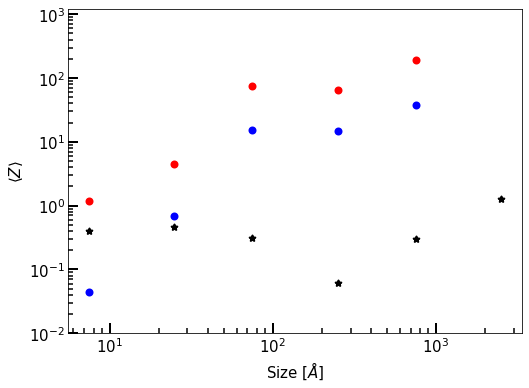

In [19]:
fig = plt.figure(figsize=(7,5))

ax = fig.add_axes([0.5, 0.5, 0.9, 0.9])
ax.scatter(Test_sizes, Zcent_CNM, c="b", marker="o", linewidths=2)
ax.scatter(Test_sizes, Zcent_WNM, c="r", marker="o", linewidths=2)
ax.scatter(Test_sizes, abs(Zcent_CMM), c="k", marker="*", linewidths=2)


ax.set_xscale("log")
ax.set_yscale("log")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("Size [$\\AA$]", fontsize=15)
ax.set_ylabel("$\\langle Z \\rangle$", fontsize=15)

#ax.set_yscale(np.min(abs(Zcent_CMM)), np.max(Zcent_WNM))
ax.set_ylim(1.0e-2, 1200)

fig.show()

In [20]:
# PDR
G = 1.0e3
T = 1000.
ne = 1.0
GTn = G*np.sqrt(T) / ne

Zcent_PDR = function(GTn, alpha, a, b, h)

In [21]:
print(size)
print(alpha)

[    3.5     5.     10.     50.    100.    500.   1000. ]
[ 0.4699  0.4386  0.4994  0.6009  0.29    0.34    0.4601]


In [22]:
print(size)
print(Zcent_PDR)

[    3.5     5.     10.     50.    100.    500.   1000. ]
[   0.99034461    1.52701641    3.02094377   26.0484757    44.82365357
  199.90099939  384.12610523]


---

In [17]:
# Calculate charge distribution: Same sizes and environments.

import fzMPI
import yt
from yt.units import pc, kpc, second, Kelvin, gram, erg, cm
import compute_charge_dist as fz

Loading the library to compute the charge distribution of dust grains.


In [18]:
# Define some constant parameters to be used.
mp      = 1.6726e-24  * gram # g
mH      = 1.6733e-24  * gram
mC      = 12.011*mH
#mu      = 1.2924
kb      = 1.3806e-16  *erg / Kelvin # erg K-1
GNewton = 6.6743e-8   * cm**3 / (gram * second**2 )# cm3 g-1 s-2
Msun    = 1.9884e33   * gram
#mm      = mu*mp

ppc = 3.0856776e18

# -------------------------------------------------------------
#              Create a lot of new derived fields
# -------------------------------------------------------------

# Create a derived field.
# Hydrogen number density
def numdensH(field, data): 
    nH = data["dens"]*(data["ihp "]+data["iha "]+data["ih2 "])/(1.4*mH)
    return nH

# Molecular Hydrogen number density
def numdensH2(field, data): 
    nH2 = data["dens"]*(data["ih2 "])/(1.4*mH)
    return nH2

# Carbon number density
def numdensC(field, data): 
    nC = data["dens"]*(data["icp "]+data["ico "])/(1.4*mC)
    return nC

# electron number density
def numdense(field, data): 
    ne = data["dens"]*(data["ihp "]/(1.4*mH) + data["icp "]/(1.4*mC))
    return ne

# Ionized hydrogen fraction
def xHp(field, data): 
    nH  = data["dens"]*(data["ihp "]+data["iha "]+data["ih2 "])/(1.4*mH)
    xHp = data["dens"]*data["ihp "]/(1.4*mH)
    xHp = xHp / nH
    return xHp

# Molecular hydrogen fraction
def xH2(field, data): 
    nH  = data["dens"]*(data["ihp "]+data["iha "]+data["ih2 "])/(1.4*mH)
    xH2 = data["dens"]*data["ih2 "]/(1.4*mH)
    xH2 = xH2 / nH
    return xH2

# Ionized carbon fraction
def xCp(field, data): 
    nC  = data["dens"]*(data["icp "]+data["ico "])/(1.4*mC)
    xCp = data["dens"]*data["icp "]/(1.4*mC) / nC
    return xCp

# electron fraction
def xe(field, data): 
    nH = data["dens"]*(data["ihp "]+data["iha "]+data["ih2 "])/(1.4*mH)
    nC = data["dens"]*(data["icp "]+data["ico "])/(1.4*mC)
    ne = data["dens"]*(data["ihp "]/(1.4*mH) + data["icp "]/(1.4*mC))
    xe = ne / (nH + nC)
    return xe

# electron fraction
#def GG(field, data): 
#    G = fz.get_G(data["cdto"], 1.68)
#    return G


yt.add_field('nH', function=numdensH,  units="1/cm**3", force_override=True)
yt.add_field('nH2',function=numdensH2, units="1/cm**3", force_override=True)
yt.add_field('nC', function=numdensC,  units="1/cm**3", force_override=True)
yt.add_field('ne', function=numdense,  units="1/cm**3", force_override=True)
yt.add_field('xHp', function=xHp,      units="dimensionless", force_override=True)
yt.add_field('xH2', function=xH2,      units="dimensionless", force_override=True)
yt.add_field('xCp', function=xCp,      units="dimensionless", force_override=True)
yt.add_field('xe', function=xe,        units="dimensionless", force_override=True)
#yt.add_field('G',  function=GG,        units="dimensionless", force_override=True)

fzMPI.print_to_logfile("Initializing clock.")

# Input variables.
#data_dir   = "/home/jcibanezm/codes/run/Silcc/CF_Prabesh"
data_dir   = "/Users/juan/codes/run/Silcc/CF_Prabesh"
filename   = data_dir + "/NL99_R8_cf_hdf5_chk_0028"

pf = yt.load("%s"%(filename))

c  = [0,0,0]
le = [-4.93696000e+19, -4.93696000e+19, -4.93696000e+19]
re = [ 4.93696000e+19,  4.93696000e+19,  4.93696000e+19]

box = pf.box(le, re)

min_dens = np.min(box["density"])
max_dens = np.max(box["density"])

min_nh   = np.min(box["nH"])
max_nh   = np.max(box["nH"])

min_temp = np.min(box["temperature"])
max_temp = np.max(box["temperature"])

min_ne = np.min(box["ne"])
max_ne = np.max(box["ne"])

min_xe = np.min(box["xe"])
max_xe = np.max(box["xe"])

min_Av = np.min(box["cdto"])
max_Av = np.max(box["cdto"])

/Users/juan/anaconda/lib/python2.7/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


Initializing clock.


yt : [INFO     ] 2018-12-05 00:06:48,804 Particle file found: NL99_R8_cf_hdf5_chk_0028
yt : [INFO     ] 2018-12-05 00:06:48,838 integer runtime parameter checkpointfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2018-12-05 00:06:48,840 integer runtime parameter forcedplotfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2018-12-05 00:06:48,842 integer runtime parameter nbegin overwrites a simulation scalar of the same name
yt : [INFO     ] 2018-12-05 00:06:48,844 integer runtime parameter plotfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2018-12-05 00:06:48,906 Parameters: current_time              = 5.68049127342e+14
yt : [INFO     ] 2018-12-05 00:06:48,908 Parameters: domain_dimensions         = [32  8  8]
yt : [INFO     ] 2018-12-05 00:06:48,913 Parameters: domain_left_edge          = [ -1.97478400e+20  -4.93696000e+19  -4.93696000e+19]
yt : [INFO     ] 2018-12-05 00:06:48,916 Parameters: domain_righ

In [19]:
wnm = ((box["temperature"].in_units("K") > 6.0e3)&(box["temperature"].in_units("K") < 1.0e4)&(box["iha "] > 0.6)&(box["nH"] >= 0.75))
cnm = ((box["temperature"].in_units("K") > 50)   &(box["temperature"].in_units("K") < 70)   &(box["iha "] > 0.6))
cmm = ((box["temperature"].in_units("K") < 50)   &(box["ih2 "] > 0.6) &(box["nH"] <1.0e5))

wnmtrue = np.argwhere(wnm==True)
cnmtrue = np.argwhere(cnm==True)
cmmtrue = np.argwhere(cmm==True)

wnmindex = wnmtrue[0]
#wnmindex = [3626974]
cnmindex = cnmtrue[0]
#cmmindex = cmmtrue[3626974]
cmmindex = [3479445]

grain_type = "carbonaceous"
#grain_type = "silicate"
#grain_size = [7.5, 25, 75, 250, 750, 2500]
grain_size = [2500]

G0         = 1.7

#Qabs7    = fz.get_QabsTable(grain_type, 7.5 )
#Qabs25    = fz.get_QabsTable(grain_type, 25 )
#Qabs75    = fz.get_QabsTable(grain_type, 75)
#Qabs250   = fz.get_QabsTable(grain_type, 250)
#Qabs750   = fz.get_QabsTable(grain_type, 750 )
#Qabs2500  = fz.get_QabsTable(grain_type, 2500)

#Qabs = [Qabs7, Qabs25,Qabs75,Qabs250,Qabs750,Qabs2500]

Qabs  = fz.get_QabsTable(grain_type, 2500, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")


In [20]:
indexarr = np.array([wnmindex, cnmindex, cmmindex])

temp= np.array( box["temp"][indexarr])
dd  = np.array( box["dens"][indexarr])
nH  = np.array( box["nH"]  [indexarr])
nH2 = np.array( box["nH2"]  [indexarr])
nC  = np.array( box["nC"]  [indexarr])
ne  = np.array( box["ne"]  [indexarr])
xe  = np.array( box["xe"]  [indexarr])
xHp = np.array( box["xHp"]  [indexarr])
xH2 = np.array( box["xH2"]  [indexarr])
xCp = np.array( box["xCp"]  [indexarr])
Av  = np.array( box["cdto"][indexarr])
fH2shield  = np.array( box["cdh2"][indexarr])

Ntot =  Av * 1.87e21

In [21]:
NH2 = np.zeros(3)
for i in range(3):
    NH2[i] = fz.get_NH2(fH2shield[i], temp[i])

In [22]:
ii = 0

zeta                   = fz.get_zeta(NH2[ii])
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH[ii], nC[ii]], [xHp[ii], xCp[ii]], temp[ii], grain_size[0], Ntot[ii], grain_type, Qabs, zeta, G0=G0, includeCR=True)    

In [23]:
print("--------- DONE -----------")
print(new_zmin, new_zmax)

--------- DONE -----------
(499, 679)


In [24]:
ii = 0

zeta = fz.get_zeta(NH2[ii])

############################################################################################
# Run the charge distribution calculation!!!
Jpe, Je, Jh, Jc, ZZall = fz.compute_currents ([nH[ii], nC[ii]], [xHp[ii], xCp[ii]], xH2[ii], temp[ii], zeta, grain_size[0], Ntot[ii], grain_type, Qabs, G0=G0, zmin=new_zmin, zmax=new_zmax)
JCRe, JCRpe, ZZnew     = fz.compute_CR_currents(nH[ii], zeta, grain_size[0], grain_type, Qabs, zmin=new_zmin, zmax=new_zmax)

#zeq                    = fz.get_zeq_vec      (Jpe, Je, Jh, Jc, ZZall, grain_size[kk], grain_type)
#new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH[ii], nC[ii]], [xHp[ii], xCp[ii]], temp[ii], grain_size[kk], Ntot[ii], grain_type, Qabs[kk], zeta, zeq=zeq, G0=G0, includeCR=True)    
#new_zmin, new_zmax     = int(fz.get_Zmin(grain_size[ii], grain_type[ii])), int(fz.get_Zmax(grain_size[ii], grain_type[ii]))       
        
#fz, ZZ                = fz.vector_fz        (Jpe, Je, Jh, Jc, JCRe, JCRpe, ZZall, new_zmin, new_zmax, includeCR=False)


In [39]:
print(np.min(Jpe))
print(np.max(Jpe))

0.0
0.00422556434822


In [38]:
print(Jpe)

[ 0.00422556  0.00421635  0.00420714 ...,  0.          0.          0.        ]


In [40]:
ffz, ZZ              = fz.vector_fz        (Jpe, Je, Jh, Jc, JCRe, JCRpe, ZZall, new_zmin, new_zmax, includeCR=True)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [55]:
def vector_fz(Jpe, Je, Jh, Jc, JCRe, JCRpe, ZZ, zmin, zmax, includeCR=False):
    """
    Compute the distribution function of grain charges given the currents.
    """
    import numpy as np

    #zitts = len(ZZ)
    zitts = int(zmax - zmin + 1 )
    fz     = np.zeros(zitts)
    newZZ  = np.zeros(zitts)

    # I could do the loop here over the reduced version of zmin and zmax.
    # But have the currents and charge array for longer values.

    for i in range(zitts):
        #zhere     = ZZ[i]
        zhere     = int(zmin + i)
        #print(Jpe, Je, Jh, Jc, JCRe, JCRpe, ZZ, zhere, includeCR)
        fhere     = fhere_vec(Jpe, Je, Jh, Jc, JCRe, JCRpe, ZZ, zhere, includeCR=includeCR)
        fz[i]     = fhere
        newZZ[i]  = zhere
        #f0        = f0 + fhere

    f0 = np.sum(fz)
    fz = fz/f0

    return fz, newZZ

def fhere_vec(Jpe, Je, Jh, Jc, JCRe, JCRpe, ZZ, zhere, includeCR=False):
    """
    Compute the distribution function given the currents.
    """
    import math
    import numpy as np

    fz0 = 1.0

    if zhere ==0 or zhere > np.max(ZZ) or zhere < np.min(ZZ):
        fz = fz0
    elif zhere > 0 and zhere <= np.max(ZZ):
        if 0 in ZZ:
            i00   = np.argwhere(ZZ == 0)[0][0]      # find the index of ZZ == 0
        else:
            i00 = 0
        ihere = np.argwhere(ZZ == zhere)[0][0]  # find the index of zhere.

        nbins = ihere - i00
        #print("ihere = ", ihere, "i00 = ", i00)
        #print("Number of bins = ", nbins)
        #print(ZZ)
        Jup    = np.zeros(nbins)
        Jdown  = np.zeros(nbins)

        Jup[:]   = Jpe[i00:ihere-1+1]+Jh[i00:ihere-1+1]+Jc[i00:ihere-1+1]
        Jdown[:] = Je[i00+1:ihere+1]

        if includeCR == True:
            Jup[:]   += JCRpe[i00:ihere-1+1]
            Jdown[:] += JCRe[i00+1:ihere+1]

        # Is there anywhere in Jdown == 0
        if(0.0 in Jdown):
            ihere = np.argwhere(Jdown==0)
            print ("!! Warning: Prod Je = 0. Dividing by 0 while computing fhere_vec (Z>0)")
            print ("zhere = %i, Jdown=0 at index="%(zhere, ihere))
            #exit()
        if(0.0 in Jup):
            print ("!! Warning: Prod Jpe + Jion = 0 while computing f_here (Z>0)")
            ihere = np.argwhere(Jup==0)
            print ("zhere = %i, Jup=0 at index="%(zhere, ihere))

        Jratio = np.prod(Jup / Jdown)
        fz = fz0 * Jratio

    elif zhere < 0 and zhere >= np.min(ZZ):
        if 0 in ZZ:
            i00   = np.argwhere(ZZ == 0)[0][0]      # find the index of ZZ == 0
        else:
            i00 = np.len(ZZ)-1 
        ihere = np.argwhere(ZZ == zhere)[0][0]   # find the index of zhere.

        #print("ihere and i00", ihere, i00)
        nbins = abs(ihere - i00)
        #print("Number of bins = ", nbins)
        Jup    = np.zeros(nbins)
        Jdown  = np.zeros(nbins)

        Jup[:]   = Jpe[ihere:i00-1+1]+Jh[ihere:i00-1+1]+Jc[ihere:i00-1+1]
        Jdown[:] = Je[ihere+1:i00+1]

        if includeCR == True:
            Jup[:]   += JCRpe[ihere:i00-1+1]
            Jdown[:] += JCRe[ihere+1:i00+1]


        if(0.0 in Jup):
            print ("!! Warning: Prod Jpe + Jion = 0. Dividing by 0 while computing fhere_vecv (Z<0)")
            ihere = np.argwhere(Jup==0)
            print ("zhere = %i, Jup=0 at index="%(zhere, ihere))

        if(0.0 in Jdown):
            print ("!! Warning: prod Je = 0 while computing f_here (Z<0)")
            ihere = np.argwhere(Jdown==0)
            print ("zhere = %i, Jdown=0 at index="%(zhere, ihere))

        Jratio = np.prod(Jdown / Jup)
        fz = fz0 * Jratio
        #fz = fz0 * Jdown/Jup

    return fz


In [58]:
ffz, ZZ              = vector_fz        (Jpe, Je, Jh, Jc, JCRe, JCRpe, ZZall, new_zmin, new_zmax, includeCR=True)
avg, std  = fz.weighted_avg_and_std(ZZ, ffz)

In [59]:
print(avg, std)

(590.82324968109015, 16.38339845510562)


In [ ]:
#zmean, zmode, zstd  =  np.zeros(15), np.zeros(15), np.zeros(15)
zmean, zmode, zstd  =  np.zeros((3,6)), np.zeros((3,6)), np.zeros((3,6))
zminmax = np.array(np.zeros(2*18))
fdist   = []
fdistCR   = []
phase = ["WNM", "CNM", "CMM"]

# loop over grain sizes
for kk in range(1):
    # loop over ISM phases.
    for ii in range(2):
        ii +=1
        print("Running grain size %i, phase %s"%(grain_size[kk], phase[ii]))
        
        zeta = fz.get_zeta(NH2[ii])

        new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH[ii], nC[ii]], [xHp[ii], xCp[ii]], temp[ii], grain_size[kk], Ntot[ii], grain_type, Qabs, zeta, G0=G0, includeCR=True)    
        #new_zmin, new_zmax     = int(fz.get_Zmin(grain_size[ii], grain_type[ii])), int(fz.get_Zmax(grain_size[ii], grain_type[ii]))       

        ############################################################################################
        # Run the charge distribution calculation!!!
        Jpe, Je, Jh, Jc, ZZall = fz.compute_currents ([nH[ii], nC[ii]], [xHp[ii], xCp[ii]], xH2[ii], temp[ii], zeta, grain_size[kk], Ntot[ii], grain_type, Qabs, G0=G0, zmin=new_zmin)
        JCRe, JCRpe, ZZnew     = fz.compute_CR_currents(nH[ii], zeta, grain_size[kk], grain_type, Qabs, zmax=new_zmax)


        
        #fz, ZZ                = fz.vector_fz        (Jpe, Je, Jh, Jc, JCRe, JCRpe, ZZall, new_zmin, new_zmax, includeCR=False)
        ffz, ZZ              = vector_fz        (Jpe, Je, Jh, Jc, JCRe, JCRpe, ZZall, new_zmin, new_zmax, includeCR=True)
        #ffz, ZZ                = fz.vector_fz        (Jpe, Je, Jh, Jc, ZZall, new_zmin, new_zmax)

        avg, std  = fz.weighted_avg_and_std(ZZ, ffz)
    
        print("Charge centroid = ", avg)
        print("Charge width    = ", std)

        #zmean[ii+kk*3] = avg
        #zstd[ii+kk*3]  = std
        zmean[ii, kk] =  avg
        zstd[ii, kk]  =  std

        #print("Zmin index = %i"%(ii*2+  2*kk*3))
        #print("zmin = %i"%(new_zmin))
        #print("Zmax index = %i"%(ii*2+1+2*kk*3))
        #print("zmax = %i"%(new_zmax))


        zminmax[ii*2+  2*kk*3]  = new_zmin
        zminmax[ii*2+1+2*kk*3]  = new_zmax
        
        #print(zminmax)

        #fdist[ii]   = offset + ii
        for jj in range(len(ffz)):
            fdist.append(ffz[jj])

            
        #print(ffz)
        #print(ZZ)

Running grain size 2500, phase CNM
('Charge centroid = ', 97.399418503897181)
('Charge width    = ', 9.959784563929908)
Running grain size 2500, phase CMM


In [28]:
#zmean, zmode, zstd  =  np.zeros(15), np.zeros(15), np.zeros(15)
zmean, zmode, zstd  =  np.zeros((3,6)), np.zeros((3,6)), np.zeros((3,6))
zminmax = np.array(np.zeros(2*18))
fdist   = []
fdistCR   = []
phase = ["WNM", "CNM", "CMM"]

# loop over grain sizes
for kk in range(6):
    # loop over ISM phases.
    for ii in range(3):
        
        print("Running grain size %i, phase %s"%(grain_size[kk], phase[ii]))
        
        zeta = fz.get_zeta(NH2[ii])

        ############################################################################################
        # Run the charge distribution calculation!!!
        Jpe, Je, Jh, Jc, ZZall = fz.compute_currents ([nH[ii], nC[ii]], [xHp[ii], xCp[ii]], xH2[ii], temp[ii], zeta, grain_size[kk], Ntot[ii], grain_type, Qabs[kk], G0=G0)
        JCRe, JCRpe, ZZnew     = fz.compute_CR_currents(nH[ii], zeta, grain_size[kk], grain_type, Qabs[kk])

        zeq                    = fz.get_zeq_vec      (Jpe, Je, Jh, Jc, ZZall, grain_size[kk], grain_type)
        new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH[ii], nC[ii]], [xHp[ii], xCp[ii]], temp[ii], grain_size[kk], Ntot[ii], grain_type, Qabs[kk], zeta, zeq=zeq, G0=G0, includeCR=True)    
        #new_zmin, new_zmax     = int(fz.get_Zmin(grain_size[ii], grain_type[ii])), int(fz.get_Zmax(grain_size[ii], grain_type[ii]))       
        
        #fz, ZZ                = fz.vector_fz        (Jpe, Je, Jh, Jc, JCRe, JCRpe, ZZall, new_zmin, new_zmax, includeCR=False)
        ffz, ZZ              = fz.vector_fz        (Jpe, Je, Jh, Jc, JCRe, JCRpe, ZZall, new_zmin, new_zmax, includeCR=True)
        #ffz, ZZ                = fz.vector_fz        (Jpe, Je, Jh, Jc, ZZall, new_zmin, new_zmax)

        avg, std  = fz.weighted_avg_and_std(ZZ, ffz)
    
        print("Charge centroid = ", avg)
        print("Charge width    = ", std)

        #zmean[ii+kk*3] = avg
        #zstd[ii+kk*3]  = std
        zmean[ii, kk] =  avg
        zstd[ii, kk]  =  std

        #print("Zmin index = %i"%(ii*2+  2*kk*3))
        #print("zmin = %i"%(new_zmin))
        #print("Zmax index = %i"%(ii*2+1+2*kk*3))
        #print("zmax = %i"%(new_zmax))


        zminmax[ii*2+  2*kk*3]  = new_zmin
        zminmax[ii*2+1+2*kk*3]  = new_zmax
        
        #print(zminmax)

        #fdist[ii]   = offset + ii
        for jj in range(len(ffz)):
            fdist.append(ffz[jj])

            
        #print(ffz)
        #print(ZZ)

Running grain size 7, phase WNM
('Charge centroid = ', 1.2470735044298003)
('Charge width    = ', 0.9369614468804454)
Running grain size 7, phase CNM
('Charge centroid = ', 0.061710191712555901)
('Charge width    = ', 0.5136463244624792)
Running grain size 7, phase CMM
('Charge centroid = ', -0.15343372406104103)
('Charge width    = ', 0.4368645434455347)
Running grain size 25, phase WNM
('Charge centroid = ', 6.0891892172451358)
('Charge width    = ', 1.745214747832063)
Running grain size 25, phase CNM
('Charge centroid = ', 0.68487962529701885)
('Charge width    = ', 0.9325060948851696)
Running grain size 25, phase CMM
('Charge centroid = ', 0.026922688079715183)
('Charge width    = ', 0.5430055518044505)
Running grain size 75, phase WNM
('Charge centroid = ', 24.706377721661916)
('Charge width    = ', 2.735720699141401)
Running grain size 75, phase CNM
('Charge centroid = ', 4.7948168135984401)
('Charge width    = ', 2.2389515688845667)
Running grain size 75, phase CMM
('Charge cent

/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


('Charge centroid = ', 205.07710786724792)
('Charge width    = ', 8.45576871249105)
Running grain size 750, phase CNM
('Charge centroid = ', 38.59079640852471)
('Charge width    = ', 6.210008666188962)
Running grain size 750, phase CMM
('Charge centroid = ', 4.3133945454418923)
('Charge width    = ', 2.2611580346983082)
Running grain size 2500, phase WNM


ValueError: negative dimensions are not allowed

Running grain size 7, phase WNM
('Charge centroid = ', 1.2470735044298003)
('Charge width    = ', 0.9369614468804454)
Running grain size 7, phase CNM
('Charge centroid = ', 0.061710191712555901)
('Charge width    = ', 0.5136463244624792)
Running grain size 7, phase CMM
('Charge centroid = ', -0.15343372406104103)
('Charge width    = ', 0.4368645434455347)
Running grain size 25, phase WNM
('Charge centroid = ', 6.0891892172451358)
('Charge width    = ', 1.745214747832063)
Running grain size 25, phase CNM
('Charge centroid = ', 0.68487962529701885)
('Charge width    = ', 0.9325060948851696)
Running grain size 25, phase CMM
('Charge centroid = ', 0.026922688079715183)
('Charge width    = ', 0.5430055518044505)
Running grain size 75, phase WNM
('Charge centroid = ', 24.706377721661916)
('Charge width    = ', 2.735720699141401)
Running grain size 75, phase CNM
('Charge centroid = ', 4.7948168135984401)
('Charge width    = ', 2.2389515688845667)
Running grain size 75, phase CMM
('Charge centroid = ', 0.8934093415017812)
('Charge width    = ', 1.0483656121215983)
Running grain size 250, phase WNM
('Charge centroid = ', 81.817410891155504)
('Charge width    = ', 4.685196301644939)
Running grain size 250, phase CNM
('Charge centroid = ', 19.787292119873928)
('Charge width    = ', 4.309427656948801)
Running grain size 250, phase CMM
('Charge centroid = ', 2.7157724258620415)
('Charge width    = ', 1.793058491488102)
Running grain size 750, phase WNM
/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
('Charge centroid = ', 205.07710786724792)
('Charge width    = ', 8.45576871249105)
Running grain size 750, phase CNM
('Charge centroid = ', 38.59079640852471)
('Charge width    = ', 6.210008666188962)
Running grain size 750, phase CMM
('Charge centroid = ', 4.3133945454418923)
('Charge width    = ', 2.2611580346983082)
Grain 2500 in WNM
    Centroid         Width
(590.82324968109015, 16.38339845510562)

In [ ]:
print("25 AA, warm, cold, molecular, 75 AA WNM, CNM, CMM")
print(zmean[0,:])

In [ ]:
Zdiff_CMM = zmean[2,:] - Zcent_CMM
Zdiff_CNM = zmean[1,:] - Zcent_CNM
Zdiff_WNM = zmean[0,:] - Zcent_WNM

In [ ]:
print(Zdiff_CMM)

In [ ]:
print(Zdiff_CNM)

In [ ]:
print(Zdiff_WNM)

In [ ]:
print(zmean[0,:])

In [ ]:
fig = plt.figure(figsize=(7,5))

ax = fig.add_axes([0.5, 0.5, 0.9, 0.9])

ax.scatter(Test_sizes, np.abs(Zdiff_CMM), c='k')
ax.scatter(Test_sizes, np.abs(Zdiff_CNM), c='b')
ax.scatter(Test_sizes, np.abs(Zdiff_WNM), c='r')


#ax.scatter(Test_sizes, Zcent_CNM, c="b", marker="o", linewidths=2)
#ax.scatter(Test_sizes, Zcent_WNM, c="r", marker="o", linewidths=2)
#ax.scatter(Test_sizes, abs(Zcent_CMM), c="k", marker="*", linewidths=2)

ax.set_xscale("log")
ax.set_yscale("log")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("size [$\\AA$]", fontsize=15)
ax.set_ylabel("$\\Delta \\langle Z \\rangle$", fontsize=15)

#ax.set_yscale(np.min(abs(Zcent_CMM)), np.max(Zcent_WNM))
#ax.set_ylim(0.4, 800)

fig.show()

In [131]:
print(Zcent_CNM)

[  3.48935940e-03   4.41627114e-01   5.90604909e+00   1.32652015e+01
   3.51258071e+01   1.33905178e+02]


In [133]:
print(zmean[1,:])

[  2.05809739e-02   5.59092058e-01   3.68970442e+00   1.61477676e+01
   3.61868683e+01   9.23459864e+01]


In [93]:
print(Test_sizes)

[7.5, 25, 75, 250, 750, 2500]


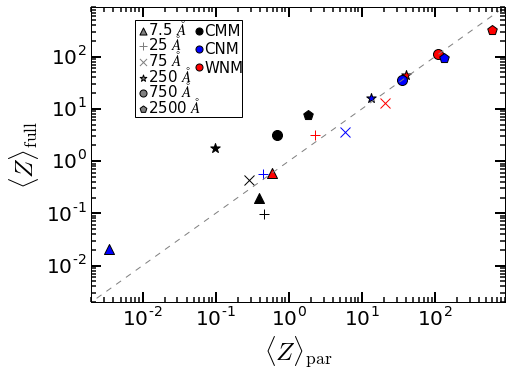

In [173]:
import matplotlib.patches as patches

fig = plt.figure(figsize=(7,5))

ax = fig.add_axes([0.17, 0.17, 0.82, 0.82])

ax.plot(np.arange(-1, 750), np.arange(-1, 750), "grey", linestyle='dashed')

markers = ["^", "+", "x", "*", "o", "p"]

for i in range(len(markers)):
    ax.scatter(np.abs(Zcent_CMM[i]), np.abs(zmean[2,i]), c='k', marker=markers[i], s=100)
    ax.scatter(np.abs(Zcent_CNM[i]), np.abs(zmean[1,i]), c='b', marker=markers[i], s=100)
    ax.scatter(np.abs(Zcent_WNM[i]), np.abs(zmean[0,i]), c='r', marker=markers[i], s=100)


#ax.scatter(Test_sizes, Zcent_CNM, c="b", marker="o", linewidths=2)
#ax.scatter(Test_sizes, Zcent_WNM, c="r", marker="o", linewidths=2)
#ax.scatter(Test_sizes, abs(Zcent_CMM), c="k", marker="*", linewidths=2)

ax.set_xscale("log")
ax.set_yscale("log")

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")

#ax.set_xlabel("$a_{400}$ $(G\\sqrt{T} / n_{e})^{0.58}$ - $a_{57}$", fontsize=15)
ax.set_xlabel("$\\langle Z \\rangle_{\mathrm{par}}$", fontsize=25)
ax.set_ylabel("$\\langle Z \\rangle_{\mathrm{full}}$", fontsize=25)

marky = np.logspace(2.5, 1.0, 6, endpoint=True)
phasey = np.logspace(2.5,1.8, 3, endpoint=True)

for i in range(len(markers)):
    ax.scatter(0.01, marky[i], c='grey', marker=markers[i], s=50)
    if i ==0 :
        ax.text   (0.012, marky[i]*0.85, "%.1f $\\AA$"%(Test_sizes[i]), fontsize=15)
    else:
        ax.text   (0.012, marky[i]*0.85, "%.0f $\\AA$"%(Test_sizes[i]), fontsize=15)
        
colors = ["black", "blue", "red"]
phases = ["CMM", "CNM", "WNM"]

for i in range(len(phasey)):
    ax.scatter(0.06, phasey[i], s=50, c=colors[i])
    ax.text(0.070, phasey[i]*0.8, phases[i], fontsize=15)

rect = patches.Rectangle((0.008, 7), 0.22, 500, linewidth=1, edgecolor='k', facecolor='none')

ax.add_patch(rect)

#ax.set_yscale(np.min(abs(Zcent_CMM)), np.max(Zcent_WNM))
ax.set_ylim(0.002, 900)
ax.set_xlim(0.002, 900)

fig.show()

fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Figure8_Carbonaceous.pdf", format="pdf")